In [45]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [46]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [47]:
print("train data :", "images :", x_img_train.shape, "labels :", y_label_train.shape)
print(" test data :", "images :", x_img_test.shape, "labels :", y_label_test.shape)

train data : images : (50000, 32, 32, 3) labels : (50000, 1)
 test data : images : (10000, 32, 32, 3) labels : (10000, 1)


In [48]:
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0

In [49]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [50]:
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

In [51]:
model = Sequential()

In [52]:
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [53]:
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [54]:
model.add(Flatten())
model.add(Dropout(0.25))

In [55]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

In [56]:
model.add(Dense(10, activation='softmax'))

In [57]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [58]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 作業:
## 請分別選用 "binary _crossentropy", "MSE",  查看Train/test accurancy and loss rate

In [59]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=20, verbose=1) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 151s 4ms/step - loss: 0.2191 - accuracy: 0.9158 - val_loss: 0.1859 - val_accuracy: 0.9268
Epoch 2/10
40000/40000 [==============================] - 186s 5ms/step - loss: 0.1741 - accuracy: 0.9314 - val_loss: 0.1664 - val_accuracy: 0.9347
Epoch 3/10
40000/40000 [==============================] - 228s 6ms/step - loss: 0.1520 - accuracy: 0.9400 - val_loss: 0.1530 - val_accuracy: 0.9397
Epoch 4/10
40000/40000 [==============================] - 229s 6ms/step - loss: 0.1358 - accuracy: 0.9469 - val_loss: 0.1444 - val_accuracy: 0.9447
Epoch 5/10
40000/40000 [==============================] - 229s 6ms/step - loss: 0.1213 - accuracy: 0.9525 - val_loss: 0.1416 - val_accuracy: 0.9455
Epoch 6/10
40000/40000 [==============================] - 231s 6ms/step - loss: 0.1093 - accuracy: 0.9575 - val_loss: 0.1351 - val_accuracy: 0.9480
Epoch 7/10
40000/40000 [==============================] - 231s

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation) :
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

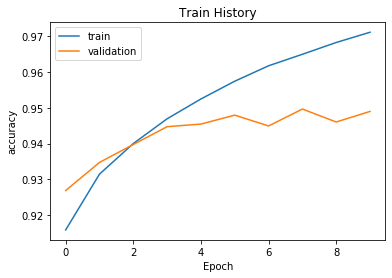

In [61]:
show_train_history(train_history, 'accuracy','val_accuracy')

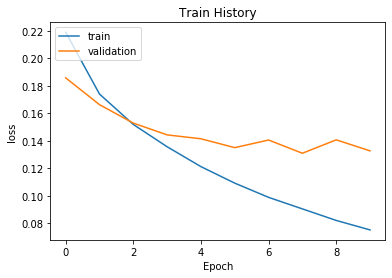

In [62]:
show_train_history(train_history, 'loss', 'val_loss')

In [63]:
model.compile(loss='MSE', 
              optimizer='adam', 
              metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=20, verbose=1) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 122s 3ms/step - loss: 0.0217 - accuracy: 0.8503 - val_loss: 0.0395 - val_accuracy: 0.7169
Epoch 2/10
40000/40000 [==============================] - 131s 3ms/step - loss: 0.0208 - accuracy: 0.8575 - val_loss: 0.0416 - val_accuracy: 0.7068
Epoch 3/10
40000/40000 [==============================] - 119s 3ms/step - loss: 0.0200 - accuracy: 0.8628 - val_loss: 0.0404 - val_accuracy: 0.7141
Epoch 4/10
40000/40000 [==============================] - 119s 3ms/step - loss: 0.0199 - accuracy: 0.8652 - val_loss: 0.0399 - val_accuracy: 0.7172
Epoch 5/10
40000/40000 [==============================] - 119s 3ms/step - loss: 0.0194 - accuracy: 0.8705 - val_loss: 0.0400 - val_accuracy: 0.7233
Epoch 6/10
40000/40000 [==============================] - 119s 3ms/step - loss: 0.0186 - accuracy: 0.8766 - val_loss: 0.0407 - val_accuracy: 0.7198
Epoch 7/10
40000/40000 [==============================] - 119s

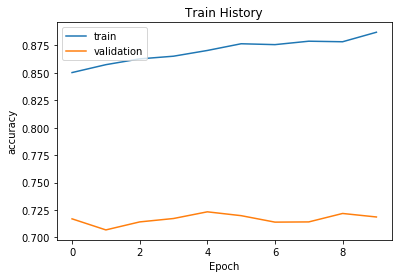

In [64]:
show_train_history(train_history, 'accuracy','val_accuracy')

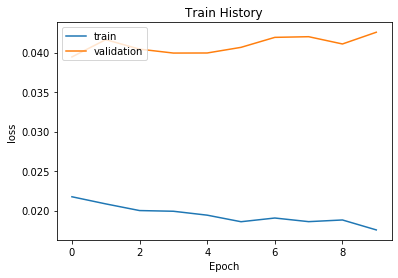

In [65]:
show_train_history(train_history, 'loss', 'val_loss')

## 結論 : 以binary_crossentropy及MSE做為損失函數來比較, 不論optimizer是adam還是sgd, binary_crossentropy都有較高的準確度.